In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# Load the cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Display the first few rows of each to verify
print("Benin Data:")
print(benin.head())

print("\nSierra Leone Data:")
print(sierra_leone.head())

print("\nTogo Data:")
print(togo.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  

Sierra Leone Data:
          Timestamp  GHI        DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  

Metric Comparison

Boxplots of GHI, DNI, DHI side-by-side 

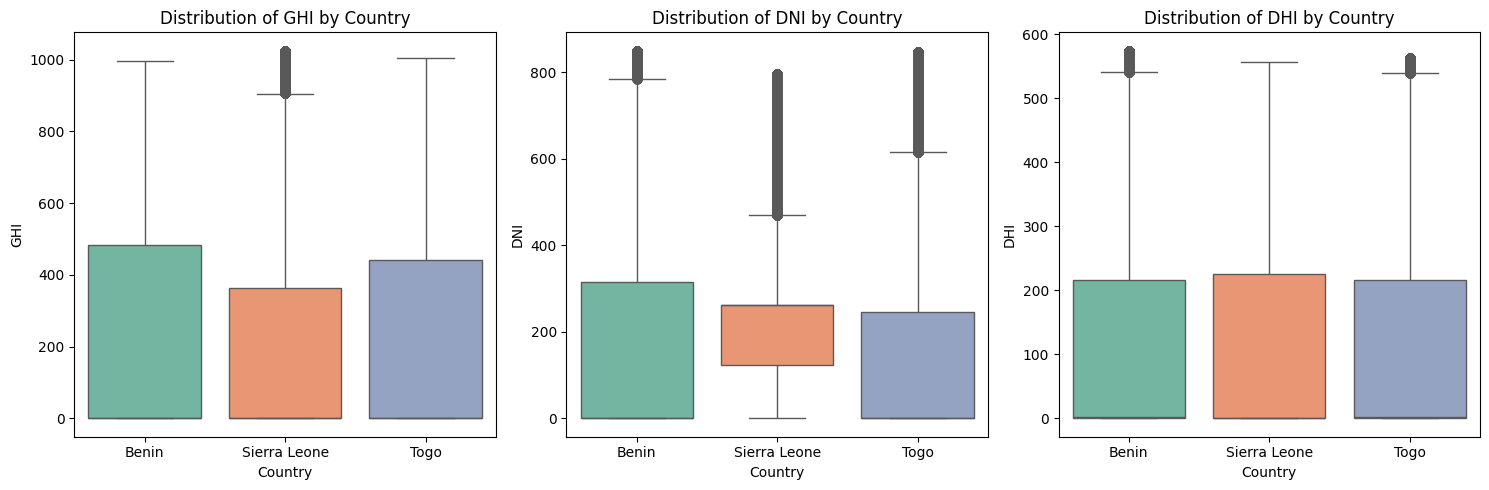

In [8]:

# Combine data for easier plotting (added a 'Country' column)
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'
combined_data = pd.concat([benin, sierra_leone, togo])

# Create boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_data, hue='Country', palette="Set2", legend=False)
    plt.title(f'Distribution of {metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')

plt.tight_layout()
plt.show()

Summary Table 

In [12]:
summary_table = combined_data.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary_table.style\
    .format("{:.2f}")\
    .set_caption("Solar Metrics by Country")\
    .background_gradient(cmap='Blues')

Statistical Testing 

In [13]:
from scipy import stats

# Extract GHI values per country
ghi_benin = benin['GHI']
ghi_sierra = sierra_leone['GHI']
ghi_togo = togo['GHI']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant differences exist (p < 0.05).")
else:
    print("No significant differences (p ≥ 0.05).")

ANOVA p-value: 0.0000
Significant differences exist (p < 0.05).


In [16]:
from scipy.stats import kruskal

# Extract GHI values
ghi_benin = benin['GHI']
ghi_togo = togo['GHI']
ghi_sierra = sierra_leone['GHI']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(ghi_benin, ghi_togo, ghi_sierra)

print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
print(f"P-value: {p_value:.4f}")


Kruskal-Wallis H-statistic: 1369.532
P-value: 0.0000


### Key Observations:
- Benin leads in solar potential with highest mean GHI (241.38), though high variability (σ=328.66) suggests seasonal fluctuations.
- Sierra Leone shows strong DNI performance (mean 248.81) despite low GHI, indicating potential for CSP technology.
- Togo has slightly better DHI metrics (median 2.50) than others, making it more favorable for diffuse-light PV systems

Visual Summary

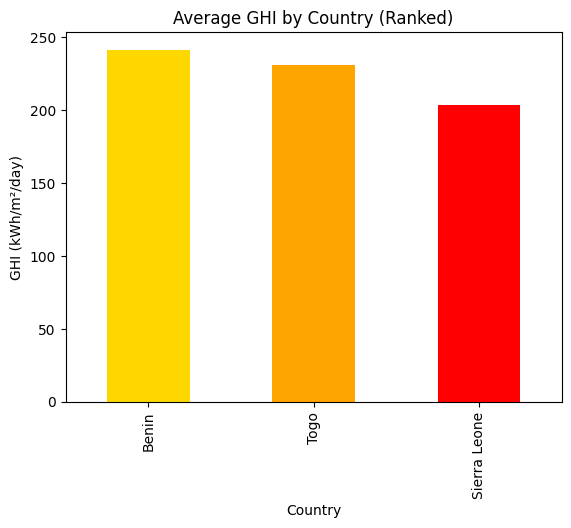

In [15]:
avg_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['gold', 'orange', 'red'])
plt.title('Average GHI by Country (Ranked)')
plt.ylabel('GHI (kWh/m²/day)')
plt.show()